# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE

# Load data

In [2]:
restaurants_data = pd.read_csv('Restaurant_revenue-data.csv')
restaurants_data

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


# Data Info

In [3]:
restaurants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


# Display Summary Statistics

In [4]:
restaurants_data.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


# Check for Missing Values

In [5]:
restaurants_data.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

# Data Cleaning

In [6]:
restaurants_data = restaurants_data.dropna()
restaurants_data = restaurants_data[restaurants_data['Monthly_Revenue'] >= 0]

# Feature Engineering

In [7]:
restaurants_data = pd.get_dummies(restaurants_data, columns=restaurants_data.select_dtypes(include='object').columns, drop_first=True)

# Explore and Handle Outliers

In [8]:
restaurants_data = restaurants_data[(restaurants_data['Monthly_Revenue'] >= 0)]

# Feature Scaling

In [9]:
scaler = StandardScaler()
num_cols = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending']
restaurants_data[num_cols] = scaler.fit_transform(restaurants_data[num_cols])

# Visualize the Distribution of Numerical Variables

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\sickp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

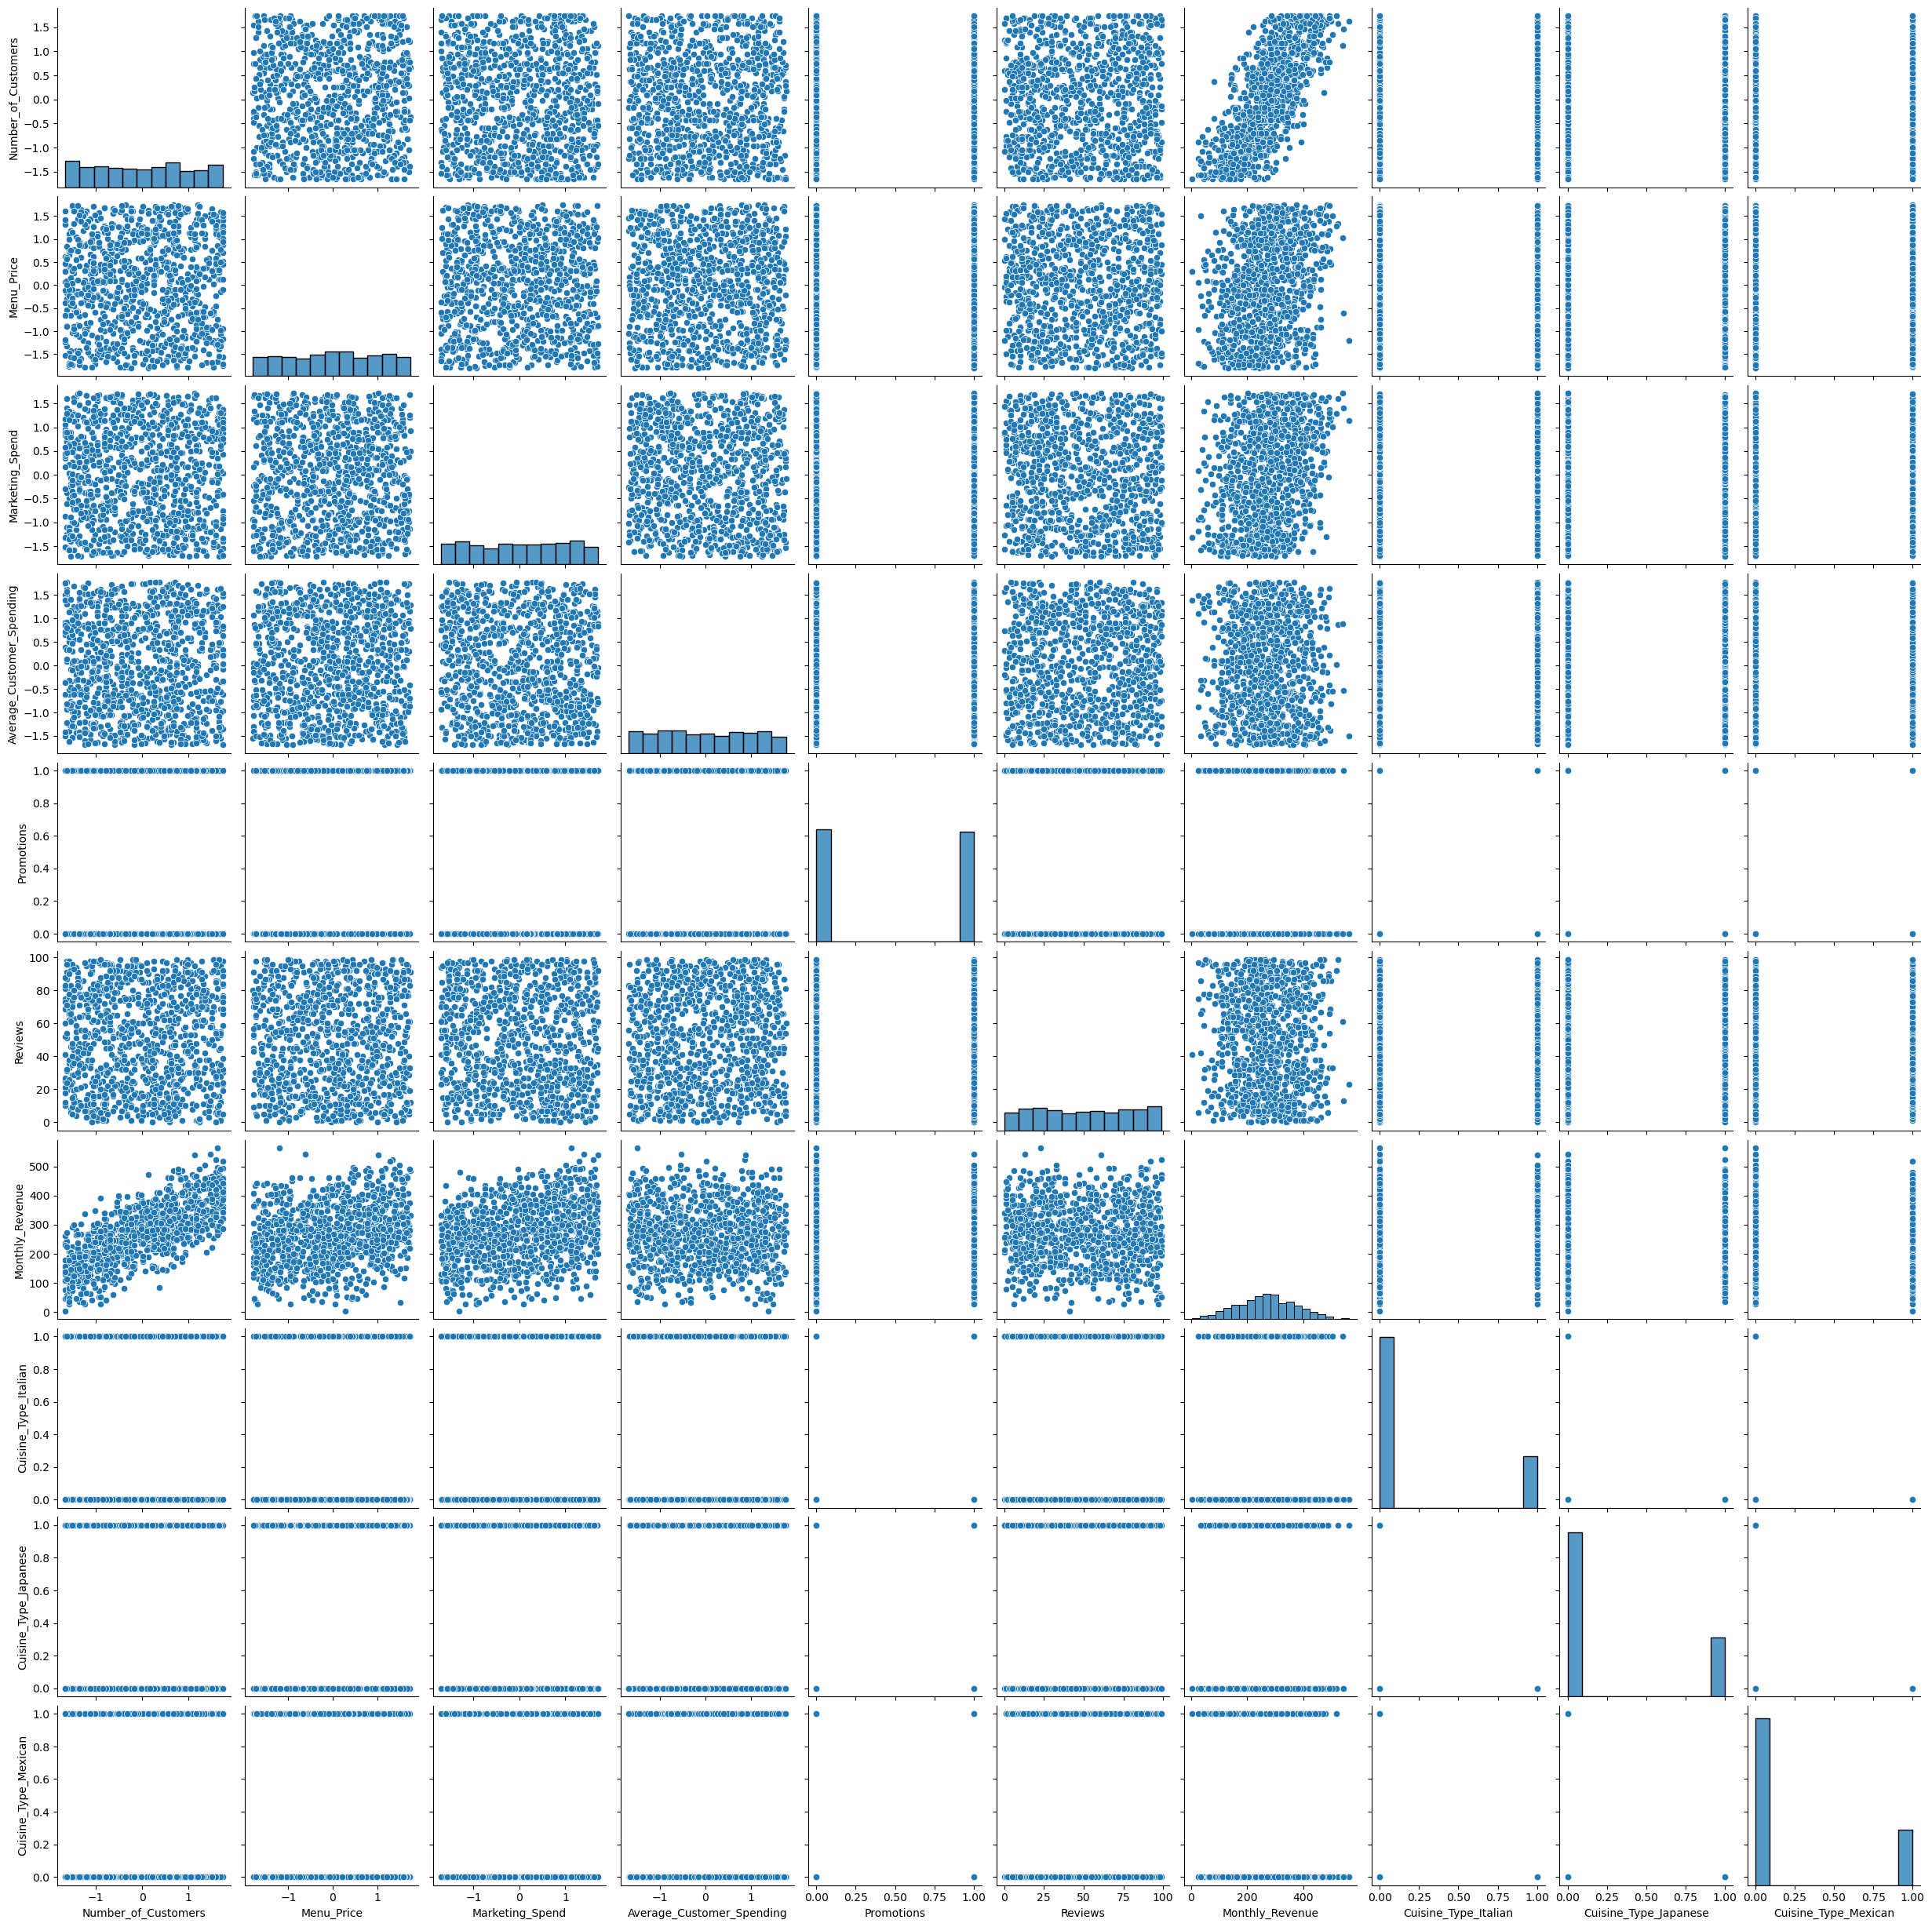

In [10]:
plt.figure(figsize=(12, 8))
sns.pairplot(restaurants_data)
plt.show()

# Visualize Correlation Matrix

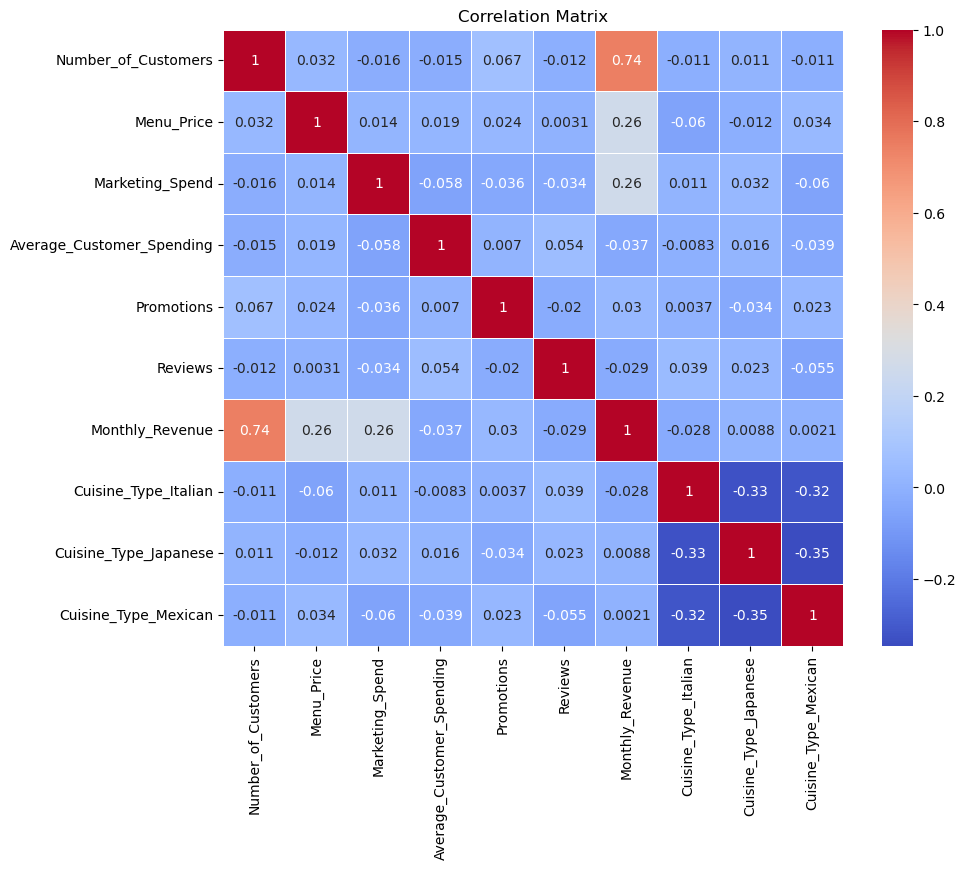

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(restaurants_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Visualize Distributions of Numerical Features

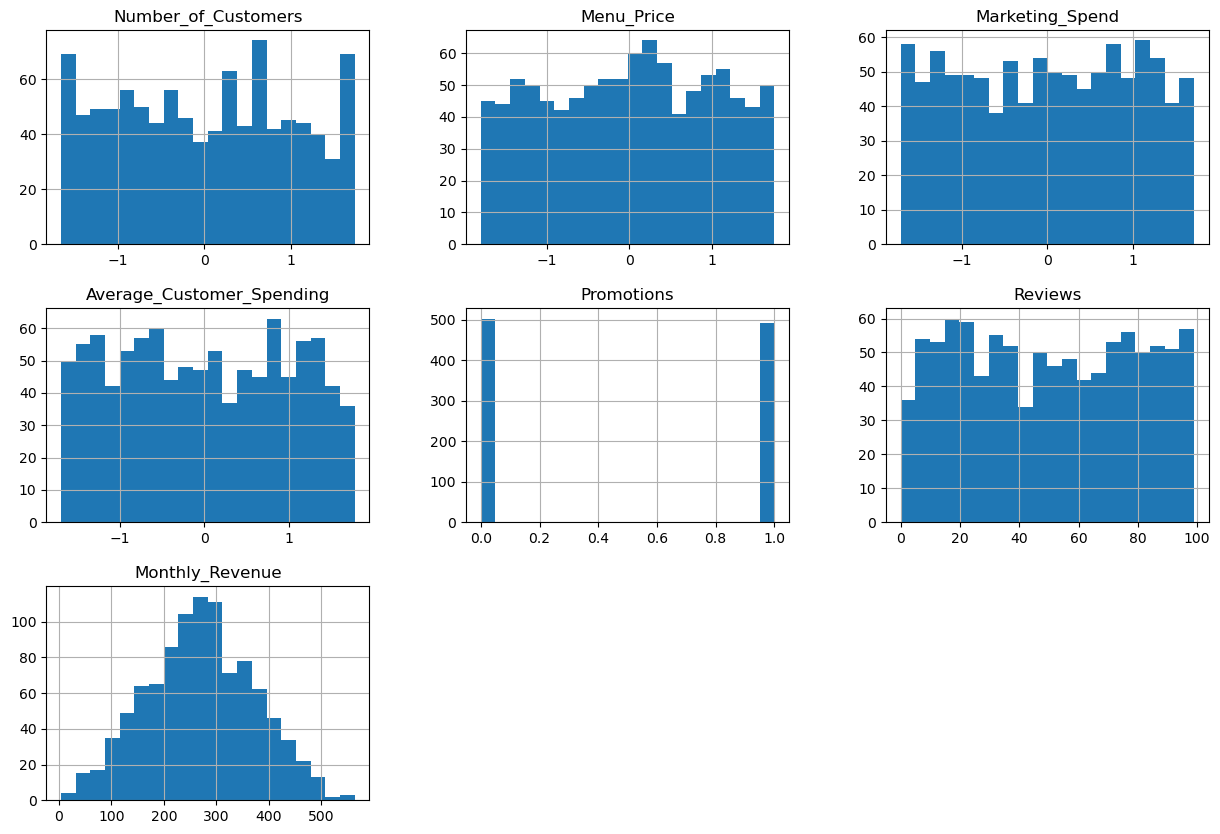

In [12]:
restaurants_data.hist(bins=20, figsize=(15, 10))
plt.show()

# Split Data Into Training and Testing Data

In [13]:
X = restaurants_data.drop('Monthly_Revenue', axis=1)
y = restaurants_data['Monthly_Revenue']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print("Training set shape:")
print(X_train.shape, y_train.shape)

print("\nTesting set shape:")
print(X_test.shape, y_test.shape)

# Display a few rows from the sets
print("\nSample from the training set:")
print(X_train.head())

print("\nSample from the testing set:")
print(X_test.head())

Training set shape:
(796, 9) (796,)

Testing set shape:
(199, 9) (199,)

Sample from the training set:
     Number_of_Customers  Menu_Price  Marketing_Spend  \
914             0.667389   -0.929772        -0.790869   
930             0.248429    0.013677        -0.287551   
979            -0.779929    1.225398        -0.452310   
770            -0.551405    0.898805         0.774822   
916             0.400778   -1.464237         0.461591   

     Average_Customer_Spending  Promotions  Reviews  Cuisine_Type_Italian  \
914                   0.603332           0       73                 False   
930                  -0.768249           0       98                 False   
979                  -0.239550           1       35                 False   
770                  -0.040320           0       35                 False   
916                  -1.240392           1       21                 False   

     Cuisine_Type_Japanese  Cuisine_Type_Mexican  
914                   True              

# Feature Selection using Recursive Feature Elimination

In [16]:
model = LinearRegression()
selector = RFE(model, n_features_to_select=8)  # Choose an appropriate number of features
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)

# Explore Non-linear Models

In [17]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Feature Selection using Recursive Feature Elimination

In [18]:
model = LinearRegression()
selector = RFE(model, n_features_to_select=8)  # Choose an appropriate number of features
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)

# Linear Regression Model

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Display The Coefficients and Intercept

In [20]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Number_of_Customers: 76.52176827128312
Menu_Price: 23.281730272962065
Marketing_Spend: 27.589353197644666
Average_Customer_Spending: -1.4837405474049554
Promotions: -2.3924302024411968
Reviews: -0.10097196504296946
Cuisine_Type_Italian: -2.0822136996316716
Cuisine_Type_Japanese: -4.936907538060326
Cuisine_Type_Mexican: 2.5647756373936828


In [21]:
print("\nIntercept:")
print(model.intercept_)


Intercept:
277.6235859751966


# Evaluating The Model

In [22]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [23]:
print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 3601.7715944991455
R-squared: 0.6474562593573193
Mean Absolute Error: 47.16206473347142


# Visualize Results

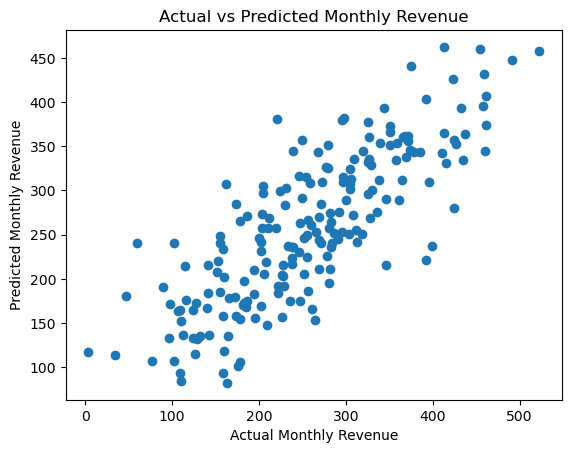

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Monthly Revenue')
plt.ylabel('Predicted Monthly Revenue')
plt.title('Actual vs Predicted Monthly Revenue')
plt.show()

# Actual and Predicted Data in a DataFrame

In [25]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [26]:
print("Actual vs Predicted Monthly Revenue:")
print(results_df.head(10))  # Display the first 10 rows for illustration

Actual vs Predicted Monthly Revenue:
         Actual   Predicted
925  298.467026  381.395970
528  461.886554  406.496199
570  395.542912  309.145000
661  304.033917  251.209745
637  178.141588  265.503664
432  424.014502  280.231283
862  124.351320  164.950902
716  109.309554   93.231443
177  281.139942  256.946458
608  399.652200  236.859142


# Bar Plot Visualization

<Figure size 1200x600 with 0 Axes>

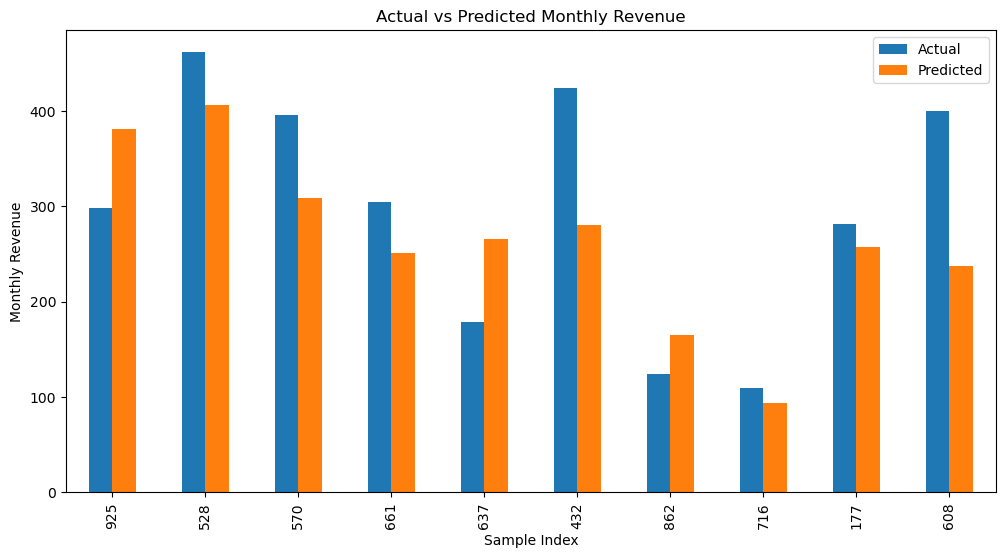

In [29]:
plt.figure(figsize=(12, 6))
results_df.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted Monthly Revenue')
plt.xlabel('Sample Index')
plt.ylabel('Monthly Revenue')
plt.show()